In [1]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import xhermes
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


# Hermes IO

In [39]:
   
db = CaseDB()
toload = [
    # dict(name="alldisabled", id = "xph9cb-alldisabled_dflux"),
    # dict(name="addrec_lofloor", id = "xph10acb-lofloor_dflux"),
    # dict(name="addrec", id = "xph10a-9c_add_recomb"),
    dict(name="hires", id = "d40b-d34_upwind1stord"),
    
]
cs = {}
for case in toload:
    force = True if case["name"] == "no_neutvisc" else False
    cs[case["name"]] = db.load_case_2D(
        case["id"], use_squash = True, verbose = True, 
        force_squash = force,
        use_xhermes = True)

C:\Users\mikek\OneDrive\Project\python-packages\xhermes\xhermes\accessors.py:7: AccessorRegistrationWarning: registration of accessor <class 'xhermes.accessors.HermesDatasetAccessor'> under name 'hermes' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class HermesDatasetAccessor(BoutDatasetAccessor):
C:\Users\mikek\OneDrive\Project\python-packages\xhermes\xhermes\accessors.py:218: AccessorRegistrationWarning: registration of accessor <class 'xhermes.accessors.HermesDataArrayAccessor'> under name 'hermes' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  class HermesDataArrayAccessor(BoutDataArrayAccessor):


- Reading case d40b-d34_upwind1stord
-----------------------
- Looking for squash file
- Squash file found. squash date 03/31/2024, 13:34:21, dmp file date 03/31/2024, 11:19:54

Unnormalising with xHermes


In [ ]:
ds["Nd"].attrs

# Plotting

In [42]:
%matplotlib widget

(-0.9, 0.0)

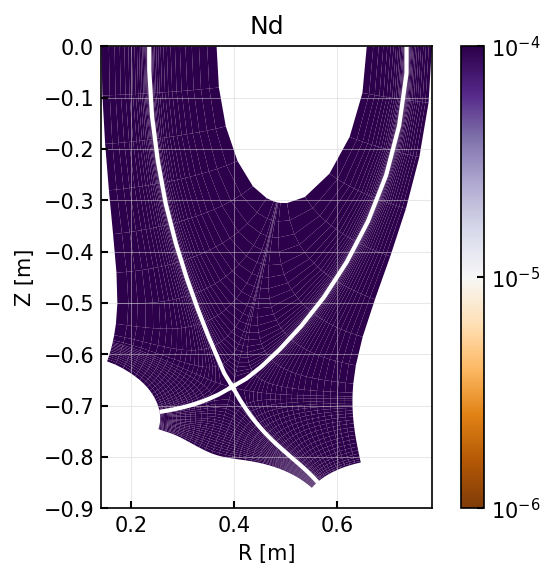

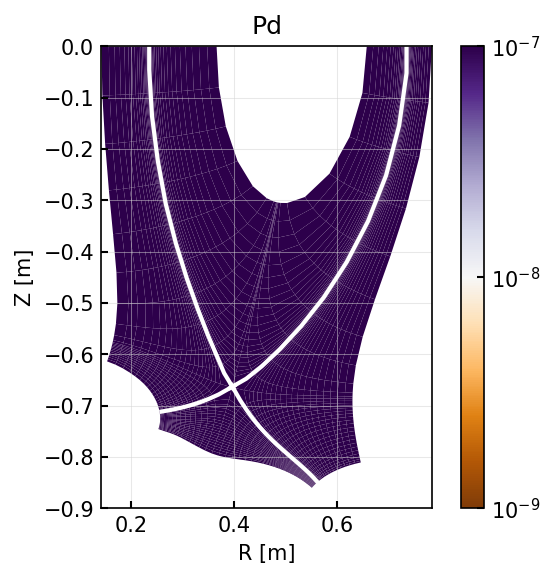

In [43]:
plt.close("all")
ds = cs["hires"].ds.isel(t=-1)
# cmap = mpl.colors.LinearSegmentedColormap.from_list("custom", ["darkorange", "white", "navy"], N=3)
cmap = "PuOr"

fig, ax = plt.subplots(dpi = 150)
param = "Nd"
(ds[param]/ds[param].attrs["conversion"]).bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                       separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
                                                       antialias = True,
                                                       logscale = True,
                                                       vmin = 1e-5*1e-1,
                                                       vmax = 1e-5*1e1)
ax.set_ylim(-0.9, 0)

fig, ax = plt.subplots(dpi = 150)
param = "Pd"
(ds[param]/ds[param].attrs["conversion"]).bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                       separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
                                                       antialias = True,
                                                       logscale = True,
                                                       vmin = 1e-8*1e-1,
                                                       vmax = 1e-8*1e1)
ax.set_ylim(-0.9, 0)

# Test for breaching floor

(-0.9, 0.0)

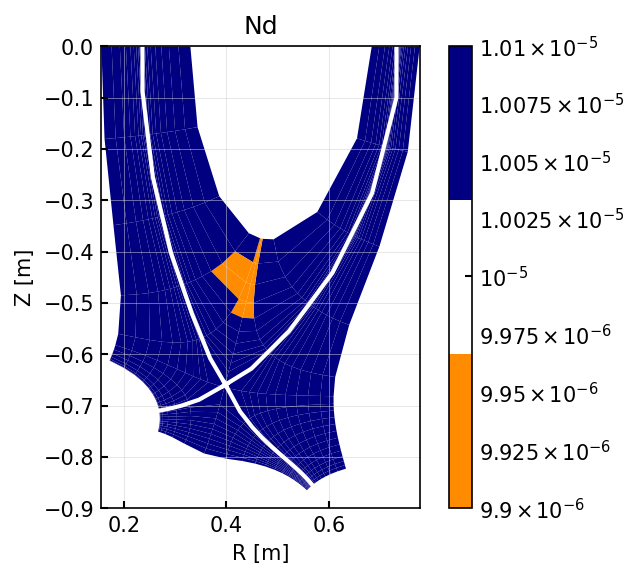

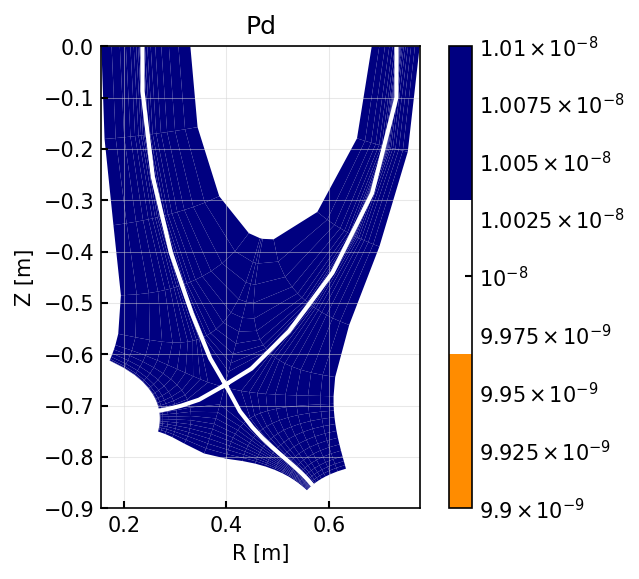

In [22]:
ds = cs["alldisabled"].ds.isel(t=-1)
cmap = mpl.colors.LinearSegmentedColormap.from_list("custom", ["darkorange", "white", "navy"], N=3)

fig, ax = plt.subplots(dpi = 150)
param = "Nd"
(ds[param]/ds[param].attrs["conversion"]).bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                       separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
                                                       antialias = True,
                                                       logscale = True,
                                                       vmin = 1e-5*0.99,
                                                       vmax = 1e-5*1.01)
ax.set_ylim(-0.9, 0)

fig, ax = plt.subplots(dpi = 150)
param = "Pd"
(ds[param]/ds[param].attrs["conversion"]).bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                       separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
                                                       antialias = True,
                                                       logscale = True,
                                                       vmin = 1e-8*0.99,
                                                       vmax = 1e-8*1.01)
ax.set_ylim(-0.9, 0)

# Temperature error

In [31]:
ds["dz"].values

array([[6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531],
       [6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531],
       [6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531],
       ...,
       [6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531],
       [6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531],
       [6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531]])

In [35]:
cs.keys()

dict_keys(['alldisabled', 'addrec_lofloor', 'addrec'])

(-0.9, 0.0)

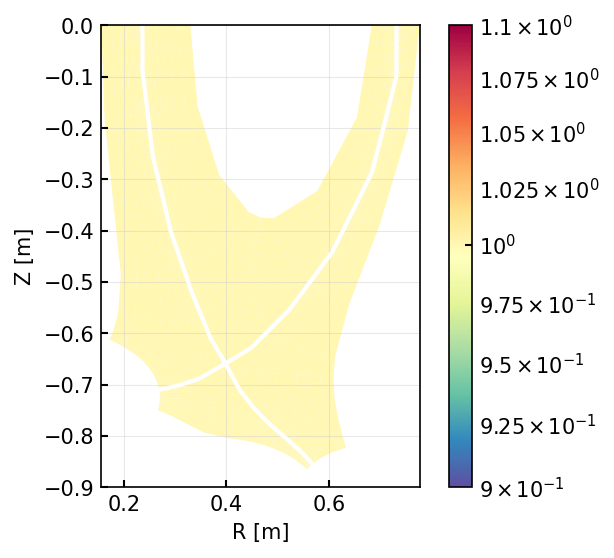

In [36]:
ds = cs["addrec_lofloor"].ds.isel(t=-1)
# cmap = mpl.colors.LinearSegmentedColormap.from_list("custom", ["darkorange", "white", "navy"], N=3)
cmap = "Spectral_r"

fig, ax = plt.subplots(dpi = 150)
param = "Nd"
Nnlim = np.clip(ds["Nd"], (1e-5*1e17), None)
Tnlim = ds["Pd"]/Nnlim/constants("q_e")
Tn = ds["Pd"]/ds["Nd"]/constants("q_e")
(Tnlim/Tn).bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                       separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
                                                       antialias = True,
                                                       logscale = True,
                                                       vmin = None,
                                                       vmax = None)
ax.set_ylim(-0.9, 0)

# fig, ax = plt.subplots(dpi = 150)
# param = "Pd"
# (ds[param]/ds[param].attrs["conversion"]).bout.polygon(ax = ax, cmap = cmap, targets = False, 
#                                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 2),
#                                                        antialias = True,
#                                                        logscale = True,
#                                                        vmin = 1e-8*1e-1,
#                                                        vmax = 1e-8*1e1)
# ax.set_ylim(-0.9, 0)